<a href="https://colab.research.google.com/github/m0hit-kumar/Cancer-Detection-Using-Deep-Learning/blob/main/BrainCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dataset from drive

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Dataset link
# https://www.dropbox.com/s/jl5ykqj6d9k6e7e/BrainTumorData.zip?dl=0

In [19]:
!wget https://www.dropbox.com/s/jl5ykqj6d9k6e7e/BrainTumorData.zip?dl=0

--2021-10-31 14:27:07--  https://www.dropbox.com/s/jl5ykqj6d9k6e7e/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jl5ykqj6d9k6e7e/BrainTumorData.zip [following]
--2021-10-31 14:27:07--  https://www.dropbox.com/s/raw/jl5ykqj6d9k6e7e/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc730828497e466da9cabc8a205a.dl.dropboxusercontent.com/cd/0/inline/BZFxlZ5TzK93DJo1o9M4BKLQL0pTLWxT2EaoAzLImIgnGLii1Dd_GYNeh0xc3FPijXPg-ClijgpfvGw0TCmTpUQb5gnmXU8dRl_zcwGuHrRfE7l_7gKI72zNpRZnj8aVQEYolVXWREK6Yo8dFN2kSFZa/file# [following]
--2021-10-31 14:27:07--  https://uc730828497e466da9cabc8a205a.dl.dropboxusercontent.com/cd/0/inline/BZFxlZ5TzK93DJo1o9M4BKLQL0pTLWxT2EaoAzLImIgnGLii1Dd_GYNeh0xc3FPijXP

In [20]:
!unzip  /content/BrainTumorData.zip?dl=0  

Archive:  /content/BrainTumorData.zip?dl=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [22]:
#count the no. of images in the respective clases
ROOT_DIR="/content/BrainTumorData/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items( )

dict_items([('Brain Tumor', 2513), ('Healthey', 2087)])



# we will split the data such that
 * 70% for Train Data
 * 15% for Validation
 * 15% for testing


In [23]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split*number_of_images[dir])-5),
                                  replace=False):
        
        O=os.path.join(ROOT_DIR,dir,img) 
        D=os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} folder exist")


In [24]:
dataFolder("train",0.7)

In [25]:
dataFolder("val",0.15)

In [26]:
dataFolder("test",0.15)

# Model build

In [27]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [28]:
#CNN Model
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation="sigmoid"))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [29]:
model.compile(optimizer="adam",loss=keras.losses.binary_crossentropy,metrics=["accuracy"] )

## Preparing our data

In [30]:
def preprocessingImages(path):
  """
  input: Path
  output:Pre Processed images
  """

  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/225,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode="binary")
  return image

In [31]:
path="/content/train"
train_data=preprocessingImages(path)

Found 3209 images belonging to 2 classes.


In [32]:
def preprocessingImages2(path):
  """
  input: Path
  output:Pre Processed images
  """

  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode="binary")
  return image

In [33]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [34]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [37]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint,EarlyStopping
# early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode="auto")

# model check stopping
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode="auto")

cd=[es,mc]

Model Traning

In [38]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,
                       validation_steps=16,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - 6s 809ms/step - loss: 0.6504 - accuracy: 0.6094 - val_loss: 0.5373 - val_accuracy: 0.7520

Epoch 00001: val_accuracy improved from -inf to 0.75195, saving model to ./bestmodel.h5
Epoch 2/30
8/8 [==============================] - 6s 793ms/step - loss: 0.5358 - accuracy: 0.7305 - val_loss: 0.5459 - val_accuracy: 0.6953

Epoch 00002: val_accuracy did not improve from 0.75195
Epoch 3/30
8/8 [==============================] - 6s 789ms/step - loss: 0.5522 - accuracy: 0.6953 - val_loss: 0.5553 - val_accuracy: 0.6934

Epoch 00003: val_accuracy did not improve from 0.75195
Epoch 4/30
8/8 [==============================] - 6s 790ms/step - loss: 0.5483 - accuracy: 0.6797 - val_loss: 0.5580 - val_accuracy: 0.6895

Epoch 00004: val_accuracy did not improve from 0.75195
Epoch 5/30
8/8 [==============================] - 6s 792ms/step - loss: 0.5630 - accuracy: 0.7266 - val_loss: 0.5167 - val_accuracy: 0.7344

Epoch 00005: val_accuracy did not improve 

In [40]:
# Model graphical interpretetion
h=hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

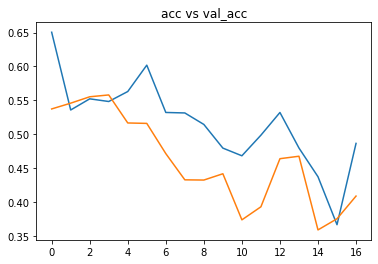

In [43]:
import matplotlib.pyplot as plt
plt.plot(h["loss"])
plt.plot(h["val_loss"])
plt.title("acc vs val_acc")
plt.show()

In [44]:
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

Model accuracy

In [46]:
acc=model.evaluate_generator(test_data)[1]

print(f"the accuracy of our model is {acc*100}%")


the accuracy of our model is 82.32694864273071%


In [47]:
from keras.preprocessing.image import load_img,img_to_array

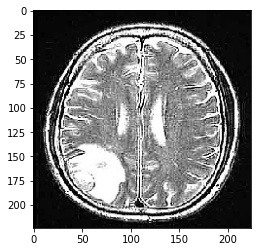

AttributeError: ignored

In [59]:
path="/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1490).jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict_classes(input_arr)[0][0]
pred
pred=int(pred)
pred

if pred==0:
  print("having Tumor")
else:
  print("not having Tumor")